In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [22]:
df = pd.read_csv('~/Downloads/bwq.csv',parse_dates=True,index_col='Measurement Timestamp')

In [23]:
df

,Beach Name,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement Timestamp,,,,,,,,,
2013-08-30 08:00:00,Montrose Beach,20.3,1.18,0.891,0.080,3.0,9.4,8/30/2013 8:00 AM,MontroseBeach201308300800
2016-05-26 13:00:00,Ohio Street Beach,14.4,1.23,NaN,0.111,4.0,12.4,05/26/2016 1:00 PM,OhioStreetBeach201605261300
2013-09-03 16:00:00,Calumet Beach,23.2,3.63,1.201,0.174,6.0,9.4,9/3/2013 4:00 PM,CalumetBeach201309031600
2014-05-28 12:00:00,Calumet Beach,16.2,1.26,1.514,0.147,4.0,11.7,5/28/2014 12:00 PM,CalumetBeach201405281200
2014-05-28 12:00:00,Montrose Beach,14.4,3.36,1.388,0.298,4.0,11.9,5/28/2014 12:00 PM,MontroseBeach201405281200
...,...,...,...,...,...,...,...,...,...
2017-09-12 12:00:00,Ohio Street Beach,19.9,2.61,NaN,0.187,3.0,10.5,09/12/2017 12:00 PM,OhioStreetBeach201709121200
2017-09-12 13:00:00,Ohio Street Beach,19.8,0.00,NaN,0.187,3.0,10.5,09/12/2017 1:00 PM,OhioStreetBeach201709121300
2017-09-12 15:00:00,Ohio Street Beach,22.3,0.00,NaN,0.187,3.0,10.5,09/12/2017 3:00 PM,OhioStreetBeach201709121500


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34923 entries, 2013-08-30 08:00:00 to 2017-09-12 18:00:00
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   34923 non-null  object 
 1   Water Temperature            34917 non-null  float64
 2   Turbidity                    34917 non-null  float64
 3   Transducer Depth             10034 non-null  float64
 4   Wave Height                  34690 non-null  float64
 5   Wave Period                  34690 non-null  float64
 6   Battery Life                 34917 non-null  float64
 7   Measurement Timestamp Label  34917 non-null  object 
 8   Measurement ID               34923 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.7+ MB


In [25]:
df.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,34917.000000,34917.000000,10034.000000,34690.000000,34690.000000,34917.000000
mean,19.363387,4.823575,1.570235,-1516.116166,-1512.482041,11.038205
std,3.356908,33.506600,0.175118,12220.244835,12220.696864,0.771769
min,0.000000,0.000000,-0.082000,-99999.992000,-100000.000000,4.800000
25%,17.100000,0.660000,1.426000,0.110000,3.000000,10.600000
50%,19.600000,1.260000,1.578000,0.154000,3.000000,11.000000
75%,22.000000,2.540000,1.721000,0.201000,4.000000,11.500000
max,31.500000,1683.480000,2.214000,1.467000,10.000000,13.300000


In [26]:
df = df.drop(columns='Transducer Depth').dropna()

In [27]:
df.isna().any().any()

False

In [28]:
ohio_df = df[(df['Wave Height'] > 0) & (df['Wave Period'] > 0) & (df['Beach Name'] == 'Ohio Street Beach')]

In [30]:
ohio_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9302 entries, 2016-05-26 13:00:00 to 2017-09-12 18:00:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Beach Name                   9302 non-null   object 
 1   Water Temperature            9302 non-null   float64
 2   Turbidity                    9302 non-null   float64
 3   Wave Height                  9302 non-null   float64
 4   Wave Period                  9302 non-null   float64
 5   Battery Life                 9302 non-null   float64
 6   Measurement Timestamp Label  9302 non-null   object 
 7   Measurement ID               9302 non-null   object 
dtypes: float64(5), object(3)
memory usage: 654.0+ KB


In [32]:
ohio_df.describe()

,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
count,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000
mean,20.255074,7.642905,0.159788,3.464954,11.058353
std,2.956531,50.858765,0.052160,1.192298,0.700298
min,12.300000,0.000000,0.013000,1.000000,8.400000
25%,18.000000,1.070000,0.123000,3.000000,10.600000
50%,20.700000,1.640000,0.170000,3.000000,11.000000
75%,22.700000,2.910000,0.187000,4.000000,11.500000
max,26.500000,1190.020000,0.443000,10.000000,13.300000


In [33]:
ohio_ts = ohio_df['Turbidity']

In [34]:
ohio_ts

Measurement Timestamp
2016-05-26 13:00:00     1.23
2013-09-03 03:00:00     4.97
2014-06-05 12:00:00     1.60
2014-06-06 14:00:00     0.70
2014-06-06 17:00:00     0.78
                       ...  
2017-09-12 12:00:00     2.61
2017-09-12 13:00:00     0.00
2017-09-12 15:00:00     0.00
2017-09-12 17:00:00    26.97
2017-09-12 18:00:00    27.55
Name: Turbidity, Length: 9302, dtype: float64

<AxesSubplot:xlabel='Measurement Timestamp'>

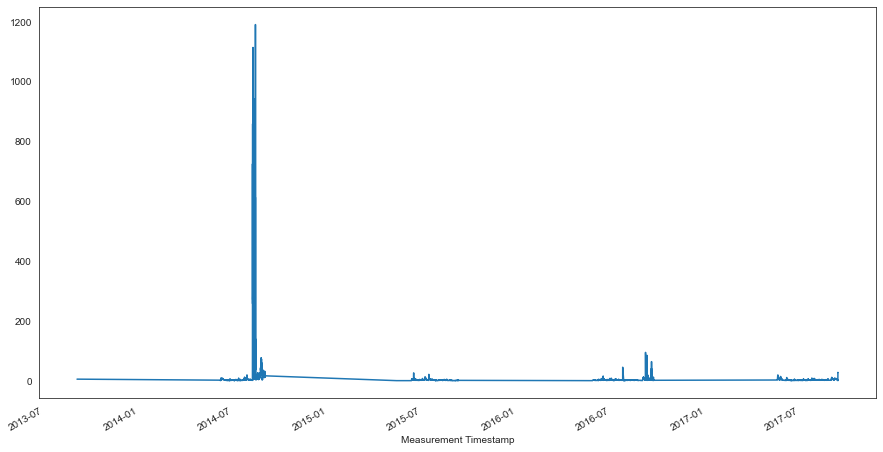

In [39]:
ohio_ts.plot(figsize=(15,8))